In [5]:
# Initial imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [9]:
# Load the the dataset into the notebook

file_path = "Resources/Database/life_expect.csv"

In [10]:
# create the dataframe without the numbered rows by using index = 0
df = pd.read_csv(file_path, index_col=0)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt

# GDP vs LE

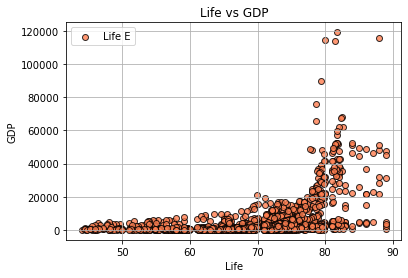

In [16]:
# Build the scatter plots
plt.scatter(df['Life expectancy '],
      df['GDP'],
      c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Life E")
plt.title("Life vs GDP")
plt.ylabel("GDP")
plt.xlabel("Life")
plt.grid(True)
# Add the legend.
plt.legend()

# GDP vs LE vs Population

In [18]:
# Creating a 3D-Scatter
fig = px.scatter_3d(
    df,
    x="GDP",
    y="Life expectancy ",
    z="Population",
    color="Status",
    symbol="Status",
    width=800,
    
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [20]:
file_path = "Resources/Database/drinking_water.csv"
# create the dataframe without the numbered rows by using index = 0
df_water = pd.read_csv(file_path, index_col=0)
df_water.head()

,Year,Drinking_Water
Country,,
Afghanistan,2017,57.32
Afghanistan,2016,54.84
Afghanistan,2015,52.39
Afghanistan,2014,49.96
Afghanistan,2013,47.56


In [21]:
# Combine the data into a single dataset
water_gdp_df = pd.merge(df, df_water, how="left", on=["Year","Country"])
water_gdp_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Drinking_Water
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,52.39
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,49.96
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,47.56
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,45.19
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,42.84


# GDP vs LE vs DW

In [22]:
# Creating a 3D-Scatter
fig = px.scatter_3d(
    water_gdp_df,
    x="GDP",
    y="Life expectancy ",
    z="Drinking_Water",
    color="Status",
    symbol="Status",
    width=800,
    
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

# Schooling vs LE ve DW

In [23]:
# Creating a 3D-Scatter
fig = px.scatter_3d(
    water_gdp_df,
    x="Schooling",
    y="Life expectancy ",
    z="Drinking_Water",
    color="Status",
    symbol="Status",
    width=800,
    
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

# Diptheria vs LE vs DW

In [25]:
# Creating a 3D-Scatter
fig = px.scatter_3d(
    water_gdp_df,
    x="Diphtheria ",
    y="Life expectancy ",
    z="Drinking_Water",
    color="Status",
    symbol="Status",
    width=800,
    
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()